## Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

In [22]:
df = pd.read_csv('data_cleaned.csv')

In [23]:
df.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
0,0,1,36,1,1,0,1,1,6
1,1,1,37,1,2,8,2,4,6
2,0,1,69,0,2,0,1,1,6
3,1,1,59,0,3,11,3,2,6
4,0,0,19,0,4,11,1,4,6


In [24]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
0,0,1,36,1,1,0,1,1,6
1,1,1,37,1,2,8,2,4,6
2,0,1,69,0,2,0,1,1,6
3,1,1,59,0,3,11,3,2,6
4,0,0,19,0,4,11,1,4,6
...,...,...,...,...,...,...,...,...,...
2622,1,0,29,0,2,9,1,4,6
2623,0,0,35,1,5,1,1,1,6
2624,0,0,53,1,8,1,1,2,6
2625,1,1,47,1,3,1,3,5,4


In [4]:
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)

In [5]:
df

array([[0.        , 1.        , 0.25352113, ..., 0.        , 0.        ,
        0.83333333],
       [1.        , 1.        , 0.26760563, ..., 0.5       , 0.375     ,
        0.83333333],
       [0.        , 1.        , 0.71830986, ..., 0.        , 0.        ,
        0.83333333],
       ...,
       [0.        , 0.        , 0.49295775, ..., 0.        , 0.125     ,
        0.83333333],
       [1.        , 1.        , 0.4084507 , ..., 1.        , 0.5       ,
        0.5       ],
       [0.        , 0.        , 0.35211268, ..., 0.        , 0.25      ,
        1.        ]])

In [6]:
dff = pd.DataFrame(np.array(df), columns =['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category'])

In [7]:
dff.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
0,0.0,1.0,0.253521,1.0,0.000,0.000000,0.0,0.000,0.833333
1,1.0,1.0,0.267606,1.0,0.125,0.571429,0.5,0.375,0.833333
2,0.0,1.0,0.718310,0.0,0.125,0.000000,0.0,0.000,0.833333
3,1.0,1.0,0.577465,0.0,0.250,0.785714,1.0,0.125,0.833333
4,0.0,0.0,0.014085,0.0,0.375,0.785714,0.0,0.375,0.833333


In [45]:
k_rng = range(1,6)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(dff)
    sse.append(km.inertia_)


In [46]:
sse

[6841.999569554032,
 3501.4826536636806,
 2352.2793615547735,
 1858.4401913495365,
 1587.1784995856676]

In [47]:
mycenters = pd.DataFrame({'Cluster' : k_rng, 'SSE' : sse })

<AxesSubplot:xlabel='Cluster', ylabel='SSE'>

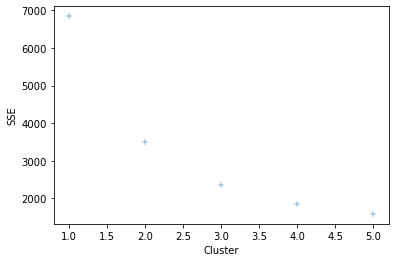

In [48]:
sns.scatterplot(x = 'Cluster', y = 'SSE', data = mycenters, marker = "+")

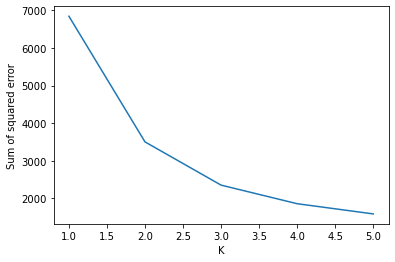

In [49]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [50]:

for i in range(3,15):
    labels = cluster.KMeans(n_clusters=i, init = "k-means++", random_state = 200).fit(dff).labels_
    print("Silhouette score for k(clusters) = "+str(i)+" is "
         + str(metrics.silhouette_score(dff,labels, metric='euclidean', sample_size=1000, random_state=200)))


Silhouette score for k(clusters) = 3 is 0.4124319897759794
Silhouette score for k(clusters) = 4 is 0.4190972117869178
Silhouette score for k(clusters) = 5 is 0.43995927913852795
Silhouette score for k(clusters) = 6 is 0.443066293529914
Silhouette score for k(clusters) = 7 is 0.4376364165983126
Silhouette score for k(clusters) = 8 is 0.4371165731875184
Silhouette score for k(clusters) = 9 is 0.44644873616282743
Silhouette score for k(clusters) = 10 is 0.4403456712388064
Silhouette score for k(clusters) = 11 is 0.43109329270657737
Silhouette score for k(clusters) = 12 is 0.4115229882924395
Silhouette score for k(clusters) = 13 is 0.38611304309309274
Silhouette score for k(clusters) = 14 is 0.3510232444683066


In [61]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(dff)

KMeans(n_clusters=2)

In [62]:
Kmean.cluster_centers_

array([[6.39614075e-01, 8.77412032e-01, 4.46755448e-01, 7.32690125e-01,
        5.44338820e-01, 1.72774445e-01, 3.93303065e-01, 2.09633939e-01,
        7.01948543e-01, 1.36946652e+00],
       [3.43352601e-01, 1.11022302e-15, 1.87120410e-01, 3.80346821e-01,
        3.82803468e-01, 2.10074319e-01, 6.35838150e-03, 2.68641618e-01,
        6.56840077e-01, 3.65664740e+00]])

In [63]:
#plt.scatter(X[ : , 0], X[ : , 1], s =50, c=’b’)

#plt.scatter(-0.94665068, -0.97138368, s=200, c=’g’, marker=’s’)

#plt.scatter(2.01559419, 2.02597093, s=200, c=’r’, marker=’s’)

#plt.show()

In [64]:
y_predicted = km.fit_predict(dff)
y_predicted

array([0, 0, 2, ..., 1, 0, 1])

In [65]:
dff['cluster'] = y_predicted
dff

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,cluster
0,0.0,1.0,0.253521,1.0,0.000,0.000000,0.0,0.000,0.833333,0
1,1.0,1.0,0.267606,1.0,0.125,0.571429,0.5,0.375,0.833333,0
2,0.0,1.0,0.718310,0.0,0.125,0.000000,0.0,0.000,0.833333,2
3,1.0,1.0,0.577465,0.0,0.250,0.785714,1.0,0.125,0.833333,2
4,0.0,0.0,0.014085,0.0,0.375,0.785714,0.0,0.375,0.833333,1
...,...,...,...,...,...,...,...,...,...,...
2622,1.0,0.0,0.154930,0.0,0.125,0.642857,0.0,0.375,0.833333,4
2623,0.0,0.0,0.239437,1.0,0.500,0.071429,0.0,0.000,0.833333,1
2624,0.0,0.0,0.492958,1.0,0.875,0.071429,0.0,0.125,0.833333,1
2625,1.0,1.0,0.408451,1.0,0.250,0.071429,1.0,0.500,0.500000,0


In [66]:
dff[dff['cluster'] == 4]

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,cluster
9,1.0,0.0,0.014085,0.0,0.125,0.000000,0.0,0.375,0.833333,4
10,1.0,0.0,0.056338,0.0,0.125,0.000000,0.0,0.250,0.833333,4
13,1.0,0.0,0.126761,0.0,0.125,0.571429,0.0,0.250,0.333333,4
14,1.0,0.0,0.000000,0.0,0.500,0.000000,0.0,0.250,0.833333,4
32,1.0,0.0,0.183099,0.0,0.625,0.071429,0.0,0.125,0.833333,4
...,...,...,...,...,...,...,...,...,...,...
2571,1.0,0.0,0.028169,0.0,0.125,0.071429,0.0,0.500,0.833333,4
2597,1.0,0.0,0.154930,0.0,0.500,0.000000,0.0,0.375,0.833333,4
2599,1.0,0.0,0.070423,0.0,0.500,0.071429,0.0,0.500,0.833333,4
2620,1.0,0.0,0.042254,0.0,0.125,0.071429,0.0,0.375,0.500000,4


In [73]:
dff = scaler.inverse_transform(dff)
dff

ValueError: operands could not be broadcast together with shapes (2627,10) (9,) (2627,10) 

<AxesSubplot:>

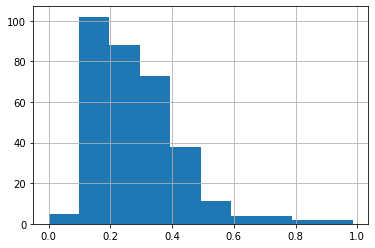

In [87]:
g1.Age.hist()